In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration globale pour l'affichage pandas
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)  # Optionnel : limite le nombre de lignes affichées


In [2]:
data=pd.read_csv("C:/Users/ABDILLAHIOMARDJAMA/Downloads/EDAPYTHON/RAW_interactions.csv")

Exploration initiale

In [3]:
##Aperçu des données
data.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!"
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!"


In [4]:
##Affichage aleatoire de 10 lignes
data.sample(10)

,user_id,recipe_id,date,rating,review
1044419,496803,178569,2011-07-21,4,"This was a wonderful fish stew! I used cod, shrimp, and mussels. There were only three of us for dinner, so I cut the recipe in half, which was perfect with some sourdough bread and a small spinach salad on the side. This was very easy to make, most of the time spent was simply letting the broth simmer, then watching the fish for doneness. I chose to completely puree my tomatoes- just personal preference. I also found that my tomatoes were just a touch too sweet, so I added a tablespoon of red wine vinegar to counter. This was a lovely, light meal, and one I'd enjoy trying again with different fish. Thanks for posting!"
1093232,898589,188840,2011-06-09,5,"Very tasty and juicy! Not exactly what I would call low-fat, but the house seasoning is great. I have mine stored in a glass jar for future use. Very flavorful. Two Thumbs up!"
219556,52262,32147,2004-03-02,4,"I followed the recipe exactly. The ribs smelled and tasted good, but something was missing from the taste and sauce was a little oily. Sorry I can't be more specific about the cause."
179577,273720,17222,2005-12-31,5,"I was just going to post this recipe and saw it already here. This is definitely the best potato soup ever! Instead of the 1 cup heavy cream, I use 1 cup half and half *and* 1 cup milk for an even creamier soup. Since potatoes come in all sizes, (we grow our own) I use 8 cups cubed. Also added 5 cloves garlic.. Yum!"
359527,645143,67256,2009-11-08,4,Heavy but very nice.
361661,171063,5170,2007-06-11,5,"Bill, these were wonderful pancakes. I followed the recommendation of nyrdchef and added vanilla extract. Great with lots of syrup and butter. Thanks for sharing."
488232,1803544937,286617,2014-12-22,5,I make this all the time for my husband. In Afghanistan its called sheer chai and its wonderful.
98114,8688,29544,2002-07-23,5,"Well Kari, we POPPED! These pork chops are so incredibly moist and tender you will need no fork! They reminded me of a sweet and sour flavor of a dish I have made many times before. I followed the directions to the letter and served over rice. The sauce this recipe makes is heavenly. An irresistible dish I will undoubtedly make again and again! Thanks, Kari!"
33787,294089,66241,2007-10-07,5,"Wow, these are so good! I made these for breakfast this morning b/c I have a quart of buttermilk on hand for another recipe. I halved the recipe and made 6 fluffy pancakes. I topped them w/fresh strawberries and a little maple syrup. Thanks for the recipe. This is a keeper."
17138,383346,415299,2011-05-09,5,I made half the recipe. I used reduced-fat cream cheese. I omitted the green pepper. I roasted a red bell pepper to use instead of the pimientos. I used more cheese. It was really easy to do. It was perfect with a steak cooked on the bbq. Thanks Sydney Mike :) Holiday tag game


In [5]:
##Structure des données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [6]:
##la taille des données
nombre_de_lignes, nombre_de_colonnes = data.shape
print(f"le nombre de lignes est : {nombre_de_lignes}")
print(f"le nombre de colonnes est : {nombre_de_colonnes}")

le nombre de lignes est : 1132367
le nombre de colonnes est : 5


Nous disposons un dataset contenant 113236 observations et 5 variables decrivatnt les interactions des utilisateurs avec le recettes de cuisines,et ci-dessous la description des variables:
- user_id : identifiant unique de l'utilisateur
 - recipe_id : identifiant unique de la recette
 - rating : note attribuée par l'utilisateur à la recette (échelle de 1 à 5)
 - date: date de l'interaction
 - review: commentaire textuel laissé par l'utilisateur sur la recette.

In [7]:
##Detection des nombres des valeurs manquantes par colonne
print(data.isnull().sum())


user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64


In [8]:
##Detection de pourcetage des valeurs manquantes par colonne
print(data.isna().mean()*100)

user_id      0.000000
recipe_id    0.000000
date         0.000000
rating       0.000000
review       0.014924
dtype: float64


In [9]:
##detection des pourcentages des valeurs manquantes du dataset
print(data.isna().mean().mean()*100)

0.0029848980056819035


In [10]:
##interpretation des valeurs manquantes:nous observons que la colonne review a 0,015% de valeurs manquantes.il est trop faible comme pourcentage et nous pouvons les ignorer,comme il s'agit des données textuelles liée a des avis des utilisatures sur les recettes,alors nous pouvons les imputer par des descriptions dependants des autres colonnes,comme le note de la recette

In [11]:
##affichage des lignes dont la note est superieur ou egale a 4 et la colonne review,afin de pouvoir voir comment les commentaire sont formulés.
data[data['rating']<4].sample(5)

,user_id,recipe_id,date,rating,review
824299,1566740,93283,2010-09-06,0,wonderful!! it was easy and tasted amazing!! if you like using your bread machine you need to try this...I love the fact that it has whole wheat flour...I used stone ground whole wheat...I was afraid it would be to heavy and it was just fine...I would like to try making the glaze on the layers...but it would probably fall appart...
771875,189616,97892,2005-03-09,3,We give it 3-B's\r\nBland\r\nBasic\r\nBoring\r\nOur boys didn't even like it
611118,125640,211225,2007-04-22,3,"Something a little different and definately interesting. I liked the flavor, but didn't care much for the texture. Like others, I started having trouble getting the cheese to stick towards the end as it got wet. If I try this again I think I'd do away with the egg and cheese altogether, and just toss the cauliflower with the spice mixture (with a little garlic powder added) in olive oil and bake. Thanks for sharing."
983414,325281,48667,2010-12-15,3,A little too sugary not my favorite but it did look festive.
760354,292332,16501,2006-03-10,1,"Don't know what I did wrong, but chicken was dry and not too flavorful. My kids definitely did not like this!"


In [12]:
####Affichons les lignes qui ont des valeurs manquantes dans la colonne review.
data[data['review'].isnull()].sample(5)

,user_id,recipe_id,date,rating,review
518338,2270186,392635,2017-04-02,5,NaN
859199,2001530119,135358,2017-05-10,4,NaN
622656,2001910636,486355,2018-02-27,4,NaN
181382,2001820255,101954,2018-01-13,5,NaN
1051494,2002157630,186294,2018-05-19,4,NaN


In [13]:
###affiché les nombres des valeur manquantes de la colonne par ligne en fonction de la note
print(data[data['review'].isnull()]['rating'].value_counts())

rating
5    135
4     27
3      3
1      3
2      1
Name: count, dtype: int64


In [14]:
##Nous allons imputer les valeurs manquantes de la colonne review en fonction de la note(rating) de la recette.
def imputer_review(row):
    if pd.isnull(row['review']):
        if row['rating'] == 5:
            return "Excellent recipe! Loved it!"
        elif row['rating'] == 4:
            return "Great recipe, will make again."
        elif row['rating'] == 3:
            return "Good recipe, but could be improved."
        elif row['rating'] == 2:
            return "Not my favorite."
        elif row['rating'] == 1:
            return "Did not like this recipe at all."
        elif row['rating'] == 0:
            return "Terrible recipe, would not recommend."
    else:
        return row['review']



In [15]:
##Application de la fonction d'imputation
data['review'] = data.apply(imputer_review, axis=1)

# Vérifions les valeurs manquantes après l'imputation
print("Valeurs manquantes après imputation :")
print(data['review'].isnull().sum())

Valeurs manquantes après imputation :
0


In [16]:
# Créer une liste des commentaires imputés
commentaires_imputes = [
    "Excellent recipe! Loved it!",
    "Great recipe, will make again.",
    "Good recipe, but could be improved.",
    "Not my favorite.",
    "Did not like this recipe at all.",
    "Terrible recipe, would not recommend."
]

# Créer la colonne indicatrice (1 = imputé, 0 = original)
data['review_imputed'] = data['review'].isin(commentaires_imputes).astype(int)

# Vérifier les résultats
print("Nombre de reviews par type :")
print(data['review_imputed'].value_counts())
print("\nPourcentage :")
print(data['review_imputed'].value_counts(normalize=True) * 100)

Nombre de reviews par type :
review_imputed
0    1132197
1        170
Name: count, dtype: int64

Pourcentage :
review_imputed
0    99.984987
1     0.015013
Name: proportion, dtype: float64


In [17]:
##Affichons nombre total des donnée observé avant et après le traitement des valeurs manquantes
print(f"Nombre total de lignes dans le dataset après traitement des valeurs manquantes : {data.shape[0]}")


Nombre total de lignes dans le dataset après traitement des valeurs manquantes : 1132367


In [18]:
##Affichage des dataset aprés traitement des valeurs manquantes
data.head()

,user_id,recipe_id,date,rating,review,review_imputed
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.,0
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!",0
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!,0
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.,0
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!",0


In [19]:
###Detection des doublons
print(f"Nombre de doublons dans le dataset : {data.duplicated().sum()}")

Nombre de doublons dans le dataset : 0


In [20]:
##affichons les utilisateurs qui ont commenté plus d'une fois la même recette.
data[data.duplicated(subset=['user_id', 'recipe_id'], keep=False)]


,user_id,recipe_id,date,rating,review,review_imputed


Nous observons qu'il y'a pas de doublons.

In [21]:
##conversions des types de données
data['date']=pd.to_datetime(data['date'])
data['user_id']=data['user_id'].astype('category')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   user_id         1132367 non-null  category      
 1   recipe_id       1132367 non-null  int64         
 2   date            1132367 non-null  datetime64[ns]
 3   rating          1132367 non-null  int64         
 4   review          1132367 non-null  object        
 5   review_imputed  1132367 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3), object(1)
memory usage: 57.3+ MB
None


Analyse descriptive

In [22]:
##Nous allons commencer a etudié d'abord comment la note(rating) est distribuée dans le dataset.
data['rating'].value_counts()

rating
5    816364
4    187360
0     60847
3     40855
2     14123
1     12818
Name: count, dtype: int64

In [23]:
data['rating'].value_counts(normalize=True)*100

rating
5    72.093588
4    16.545872
0     5.373435
3     3.607929
2     1.247210
1     1.131965
Name: proportion, dtype: float64

In [24]:
data['rating'].describe()

count    1.132367e+06
mean     4.411016e+00
std      1.264752e+00
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

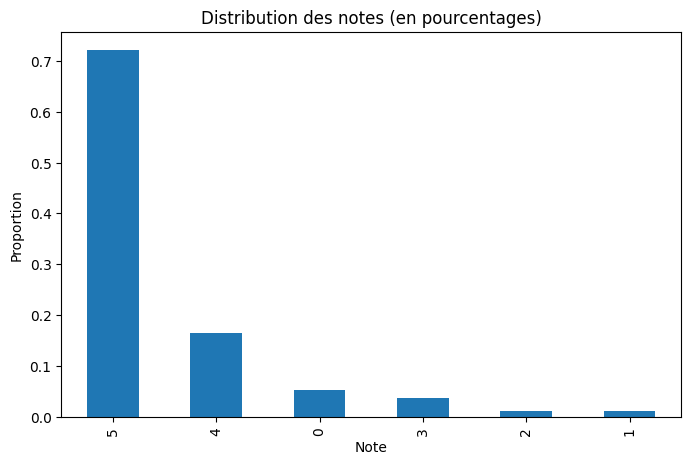

In [25]:
# Graphique pour mieux visualiser
plt.figure(figsize=(8, 5))
data['rating'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution des notes (en pourcentages)')
plt.xlabel('Note')
plt.ylabel('Proportion')
plt.show()

Nous observons que la note 5 est la plus attribuée avec environ 70% des notes,ce qui indique une tendance positive dans les avis des utilisateurs. Les notes 4 et 3 sont également présentes mais en moindre proportion, tandis que les notes 2, 1 et 0 sont très rares, représentant moins de 5% des avis. Cela suggère que la majorité des utilisateurs sont satisfaits des recettes proposées.mais ceci pourrait aussi indiquer un biais de notation, où les utilisateurs sont plus favorables à donner des notes élevées.

In [26]:
##Etudions maintenant la variable userid en determinons le top 10 des utilisateurs qui ont le plus interagi avec les recettes en fonction du nombre d'avis laissés.
top_users = data['user_id'].value_counts().sample(10)
print(top_users)


user_id
2001548092    1
1448465       1
2001235348    1
2001947557    1
2001695417    1
799522        1
28597         1
1801490765    1
874510        1
2283547       3
Name: count, dtype: int64


Text(0.5, 0, 'User ID')

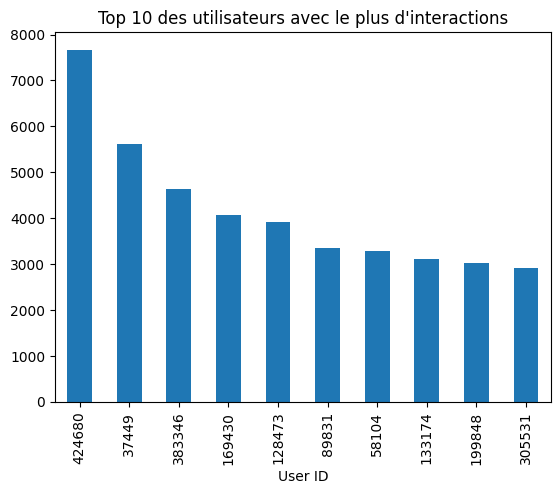

In [27]:
data['user_id'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 des utilisateurs avec le plus d\'interactions')
plt.xlabel('User ID')

In [48]:
data.loc[data['user_id'].value_counts().quantile([0.80])]

,user_id,recipe_id,date,rating,review,review_imputed
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!,0


In [57]:
data['user_id'].value_counts().head(100)

user_id
424680     7671
37449      5603
383346     4628
169430     4076
128473     3917
89831      3353
58104      3288
133174     3107
199848     3018
305531     2902
226863     2874
4470       2739
498271     2644
369715     2610
1072593    2350
176615     2338
95743      2311
286566     2283
39835      2260
107583     2252
80353      2220
88099      2165
166642     2146
131126     2138
222564     2073
107135     2020
140132     1978
126440     1950
280271     1915
461834     1900
157425     1877
593927     1807
486725     1776
174096     1758
5060       1741
482376     1719
679953     1709
104295     1642
428885     1639
542159     1621
204024     1595
163112     1582
47892      1580
422893     1543
17803      1515
136997     1509
197023     1504
8688       1492
53932      1475
29196      1455
6357       1455
67656      1455
560491     1438
323186     1437
1179225    1413
400708     1413
386585     1408
452940     1404
653438     1395
101823     1353
173579     1352
160974     1326


In [ ]:
## le nombre des users qui on laissé une seule fois un avis
data['user_id'].value_counts()[data['user_id'].value_counts() == 1].count()

np.int64(1937)

In [71]:
##determinos combiens d avis ont effectué les top 20 utilisateurs
data['user_id'].value_counts().head(20).sum()

np.int64(66224)

In [ ]:
##le nombre d interaction moyenne par utilisateur
data['user_id'].value_counts().describe()

count    226570.000000
mean          4.997868
std          49.663111
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        7671.000000
Name: count, dtype: float64

In [84]:
## le 25e percentile du nombre d'interactions par utilisateur combien d utilisateurs ont laissé au moins ce nombre d'interactions
data['user_id'].value_counts()[data['user_id'].value_counts() >= data['user_id'].value_counts().quantile(0.99)].count()


np.int64(2290)

In [ ]:
data['user_id'].value_counts().quantile([0.25,0.50,0.75,0.80,0.90,0.95,0.99])

0.25     1.0
0.50     1.0
0.75     2.0
0.80     2.0
0.90     5.0
0.95    11.0
0.99    61.0
Name: count, dtype: float64

In [85]:
##segmontons les utilisateurs en fonction du nombre d'interaction,determinons deja les percentiles et analysons.
percentiles = data['user_id'].value_counts().quantile([0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99])
print(percentiles)

0.25     1.0
0.50     1.0
0.75     2.0
0.80     2.0
0.90     5.0
0.95    11.0
0.99    61.0
Name: count, dtype: float64


In [ ]:
##On observe que 50% des utilisateurs ont laissé 1 avis et 80% des utilisateurs ont laissé au plus 2 avis.et seulement 10% des utilisateurs ont laissé 6 interactions et plus. Cela indique que la majorité des utilisateurs sont peu actifs en termes d'interactions.
##alors nous considerons qu'un user est tres actif si il effectue plus des 12 interactions,un user est actif s'il effectue entre 3 et 11 interactions,et un user est peu actif s'il effectue moins de 3 interactions.
def segmenter_utilisateur(nb_interactions):
    if nb_interactions >= 12:
        return 'Très Actif'
    elif 3 <= nb_interactions < 12:
        return 'Actif'
    else:
        return 'Occasionnel'
    
# Appliquer la segmentation
data['segment_utilisateur'] = data['user_id'].map(data['user_id'].value_counts()).apply(segmenter_utilisateur)

In [90]:
data.drop(columns=['segment_utilisateur'], inplace=True)

In [97]:
data.drop(columns=['interactions_par_user'], inplace=True)

In [ ]:
##relation entre la note et le top 20 des utilisateurs les plus actifs.
top_users = data['user_id'].value_counts().head(20).index


In [101]:
user_stats = data.groupby('user_id').agg(
    nb_interactions=('rating', 'count'),
    moyenne_note=('rating', 'mean')
).reset_index()

user_stats.head(10)

C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_5916\3758096966.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_stats = data.groupby('user_id').agg(


,user_id,nb_interactions,moyenne_note
0,1533,128,4.710938
1,1535,794,4.473552
2,1581,1,5.000000
3,1634,60,3.616667
4,1676,31,4.677419
5,1755,2,4.500000
6,1773,4,4.000000
7,1792,31,4.516129
8,1891,37,4.837838
9,1938,1,0.000000


In [102]:
user_stats['moyenne_note'].corr(user_stats['nb_interactions'])


np.float64(0.030533139164281426)

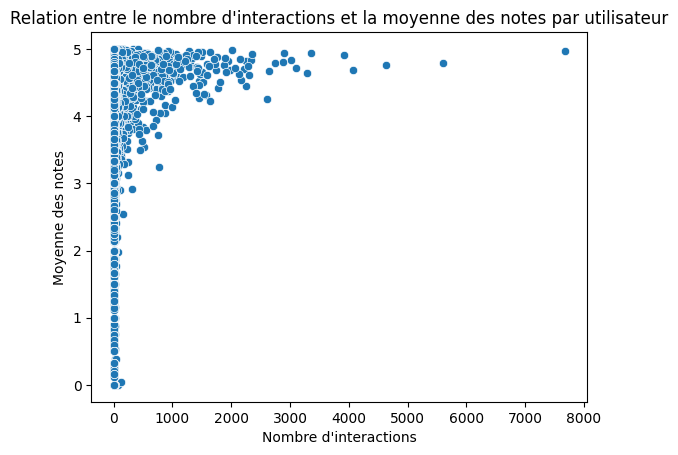

In [107]:
sns.scatterplot(x='nb_interactions', y='moyenne_note', data=user_stats)
plt.title('Relation entre le nombre d\'interactions et la moyenne des notes par utilisateur')
plt.xlabel('Nombre d\'interactions')
plt.ylabel('Moyenne des notes')
plt.show()


Nous remarqu'on qu'il existe aucune relation entre le nombre d'interaction de l'utilisateur et la note.